# Supervised Learning

**Functional Approach**

> Sven Gehrke
> Feb 2022 





In [ ]:
## Class definition first

In [1]:
import pandas as pd


class CrispDm():
	def __init__(self):
		pass

	def load(self):
		"""
		Laden der Daten
		:return: loaded data, data will be stored in self.data as well
		"""
		from sklearn.datasets import load_breast_cancer
		self.data = load_breast_cancer()
		return self.data

	def data_understanding(self, data=None):
		pass

	def data_preparation(self, data=None):
		# data = CrispDm.data_preparation_cleansing(data=data)
		return data

	def data_preparation_cleansing(data=None):
		"""
		Entferne / korrigiere Datenfehler etc
		:param data:
		:return:
		"""
		from sklearn.preprocessing import StandardScaler
		scaler = StandardScaler()
		scaler.fit(data)
		scaler.transform(data)
		return data

	def data_preparation_split(self, data=None, target=None):
		from sklearn.model_selection import train_test_split

		X_train, X_test, y_train, y_test = train_test_split(data,
		                                                    target,
		                                                    stratify=target,
		                                                    random_state=666
		                                                    )
		return X_train, y_train, X_test, y_test

	def modeling(self, x_train=None, y_train=None):
		model = {}

		from sklearn.ensemble import RandomForestClassifier
		model_RF = RandomForestClassifier(n_estimators=100,
		                                  max_depth=5
		                                  )
		model["model_RF"] = model_RF.fit(x_train, y_train)

		from sklearn.tree import DecisionTreeClassifier
		model_DT = DecisionTreeClassifier()
		model["model_DT"] = model_DT.fit(x_train, y_train)

		return model

	def evaluation(self, model=None, X_eval=None, y_eval=None, feature_names=None):
		CrispDm.evaluation_visual(self, model, X_eval, y_eval)
		CrispDm.evaluation_kpi(self, model, X_eval, y_eval)

	def evaluation_visual(self, model=None, X_eval=None, y_eval=None):

		CrispDm.evaluation_visual_feature_importance(self, model=model, X_eval=X_eval, y_eval=y_eval)
		for  model_ in [model['model_RF'].estimators_[1],
		                model['model_DT']
		                ]:
			CrispDm.evaluation_visual_random_forrest(self, model=model_, X_eval=X_eval, y_eval=y_eval, title=str(model_))

	def evaluation_visual_feature_importance(self, model=None, X_eval=None, y_eval=None):
		import matplotlib.pyplot as plt
		import numpy as np
		print("plotting feature importance")
		model_ = model['model_RF']
		n_features = X_eval.shape[1]
		plt.barh(np.arange(n_features), model_.feature_importances_, align='center')
		plt.yticks(np.arange(n_features), X_eval.columns)
		plt.xlabel("Feature importance")
		plt.ylabel("Feature")
		plt.ylim(-1, n_features)
		plt.tight_layout()
		plt.show()

	def evaluation_visual_random_forrest(self, model=None, X_eval=None, y_eval=None, title=""):
		import matplotlib.pyplot as plt
		from sklearn.tree import plot_tree
		from sklearn.tree import export_text

		plt.figure(figsize=(12, 12), dpi=216)
		plot_tree(model, filled=True)
		plt.title(F"{title}")
		plt.show()

		try:
			print(export_text(model, feature_names=list(X_eval.columns)))
		except:
			pass

	def evaluation_kpi(self, model=None, X_eval=None, y_eval=None):
		# test
		model_ = model['model_RF']
		score_eval = model_.score(X_eval, y_eval)
		score_model = model_.score(X_train, y_train)
        
		print(
			F"Mean accuracy for evaluation/ model set: {score_eval:.4}/ {score_model:.4} ({score_eval - score_model:.4})")

	def deployment_and_save(self, data=None):
		pass





## Main Part
### Load the data

In [2]:
project = CrispDm()
data = project.load()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


### Data Understanding

In [3]:
project.data_understanding(data=data)


### Data Preparation

In [4]:
X = project.data_preparation(data=X)
X_train, y_train, X_eval, y_eval = project.data_preparation_split(data=X, target=y)

### Modelling

In [5]:
model = project.modeling(x_train=X_train, y_train=y_train)

### Evaluation

plotting feature importance


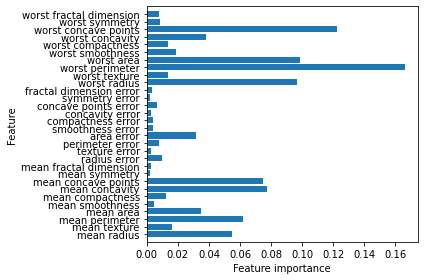

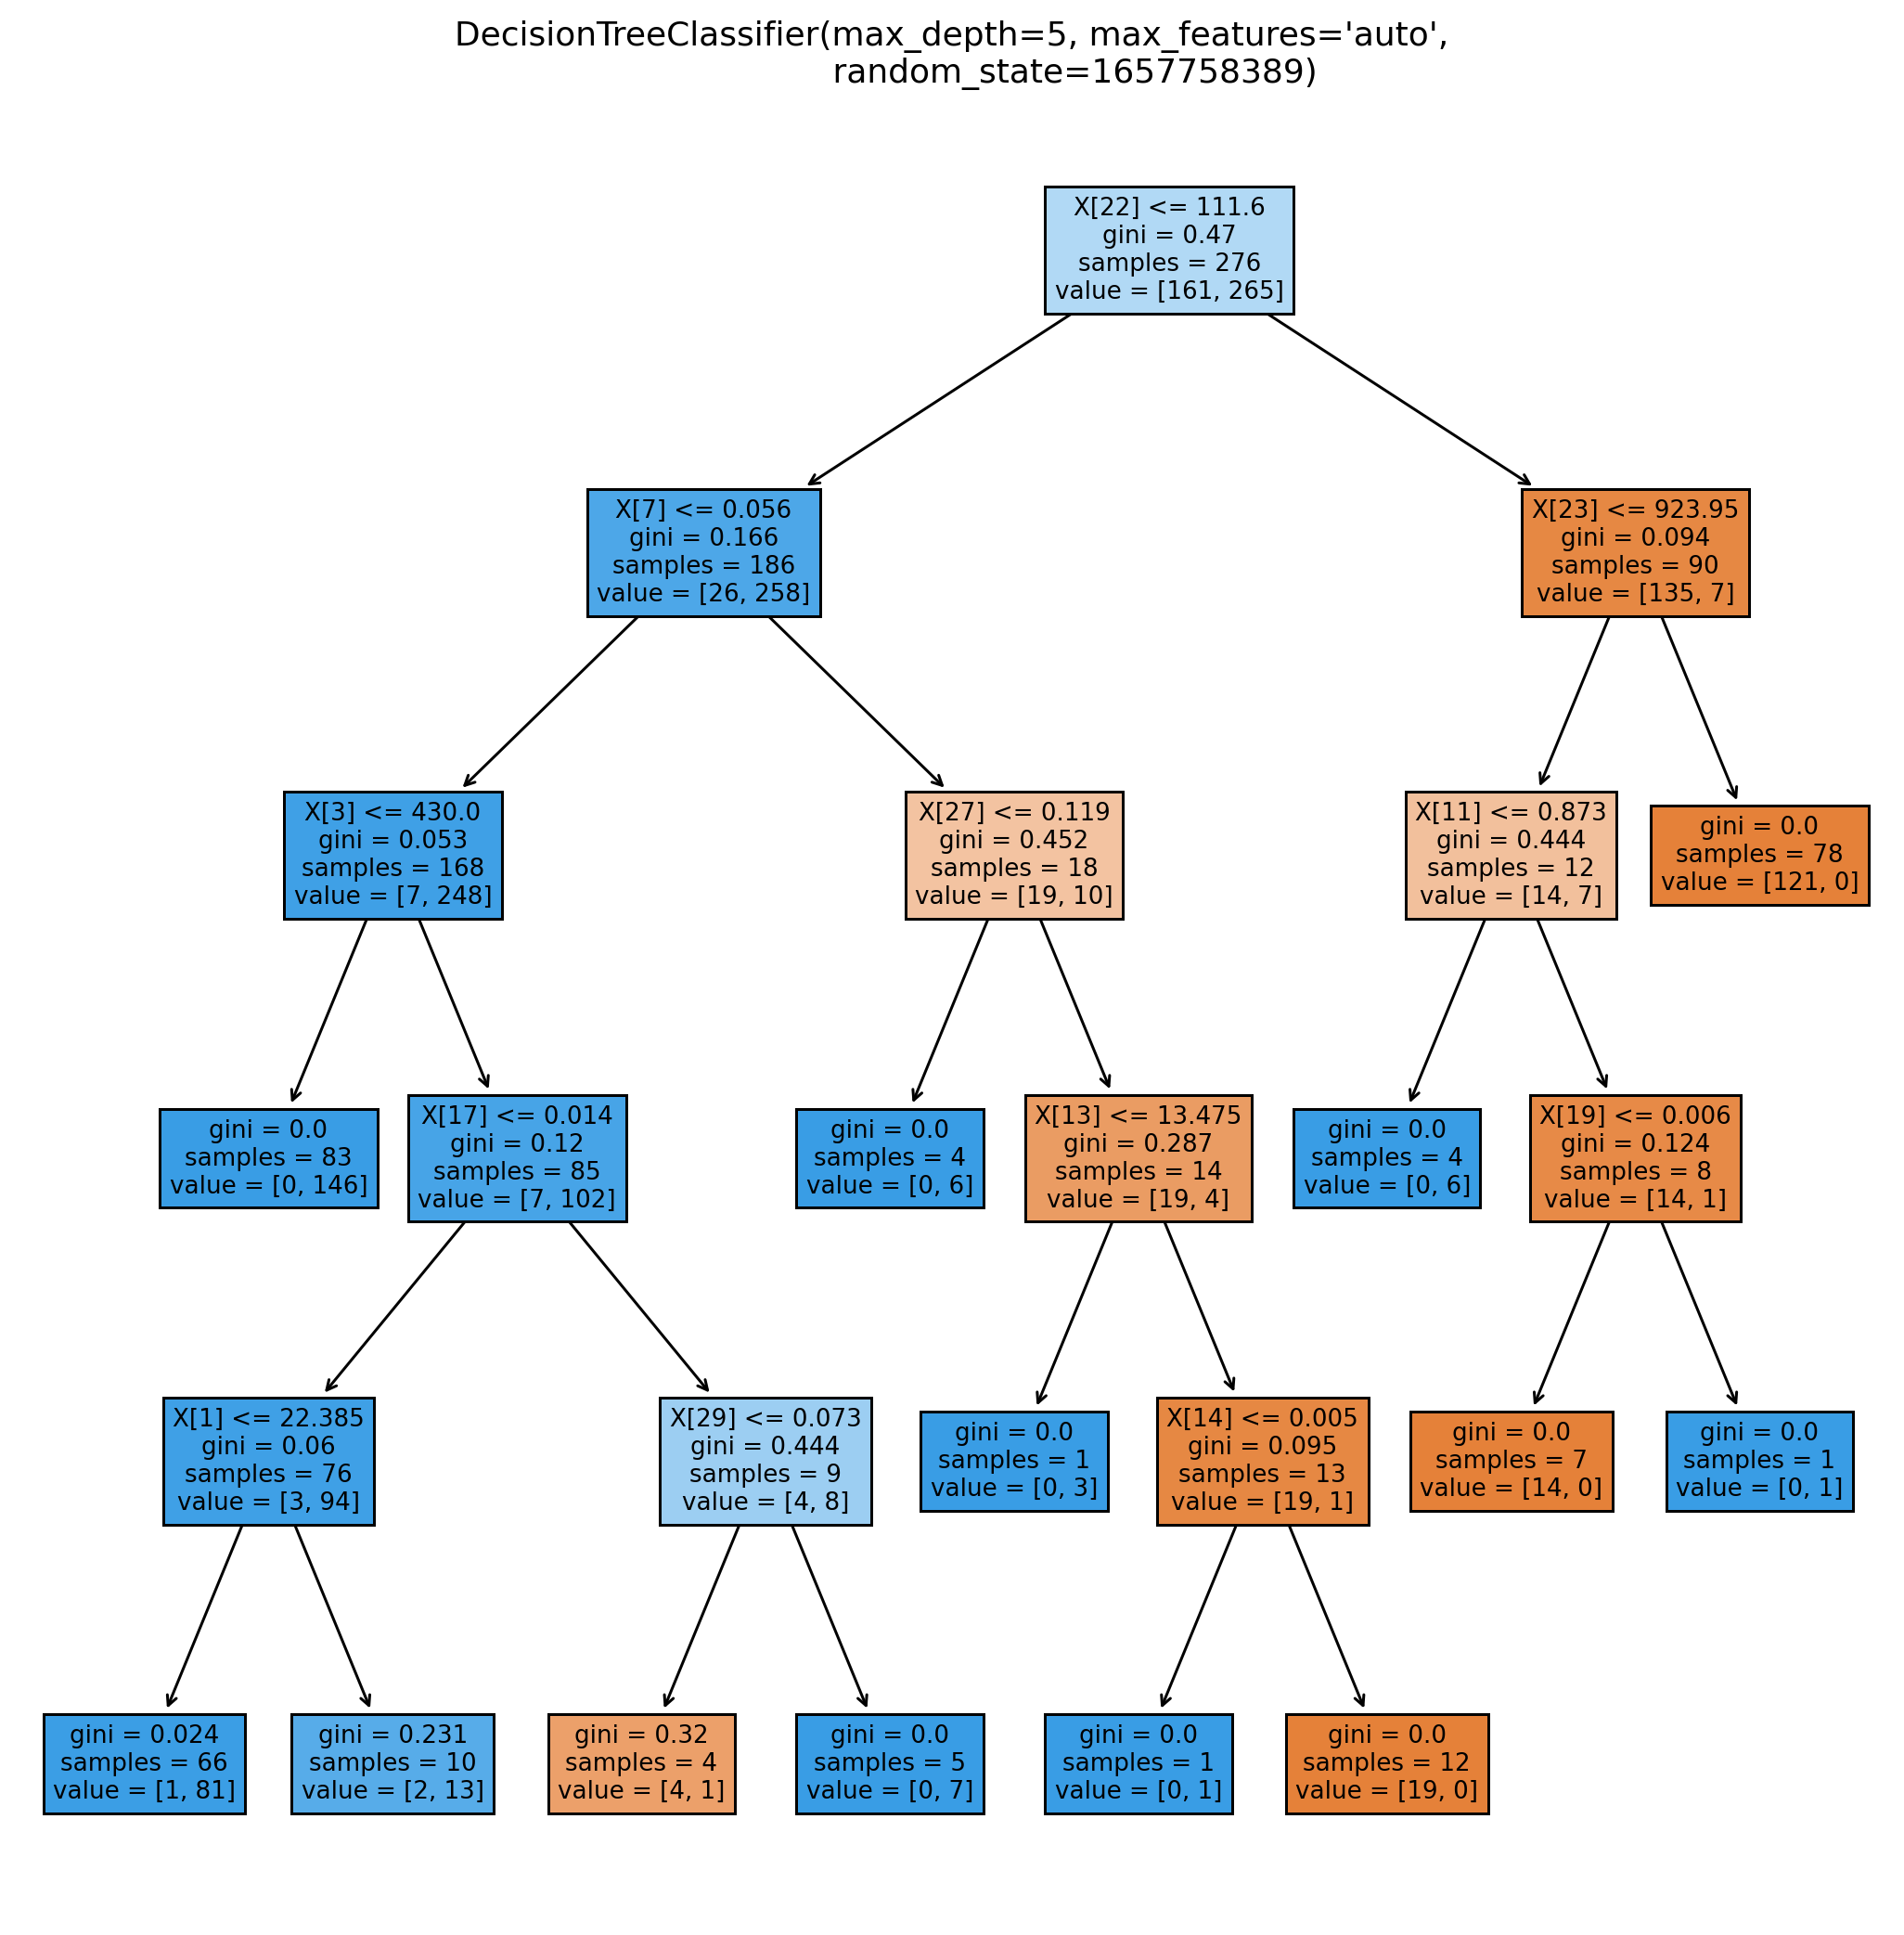

|--- worst perimeter <= 111.60
|   |--- mean concave points <= 0.06
|   |   |--- mean area <= 430.00
|   |   |   |--- class: 1.0
|   |   |--- mean area >  430.00
|   |   |   |--- concave points error <= 0.01
|   |   |   |   |--- mean texture <= 22.38
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- mean texture >  22.38
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- concave points error >  0.01
|   |   |   |   |--- worst fractal dimension <= 0.07
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- worst fractal dimension >  0.07
|   |   |   |   |   |--- class: 1.0
|   |--- mean concave points >  0.06
|   |   |--- worst concave points <= 0.12
|   |   |   |--- class: 1.0
|   |   |--- worst concave points >  0.12
|   |   |   |--- area error <= 13.47
|   |   |   |   |--- class: 1.0
|   |   |   |--- area error >  13.47
|   |   |   |   |--- smoothness error <= 0.01
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- smoothness error >  0.01
|   |   |   |   |   |--- cl

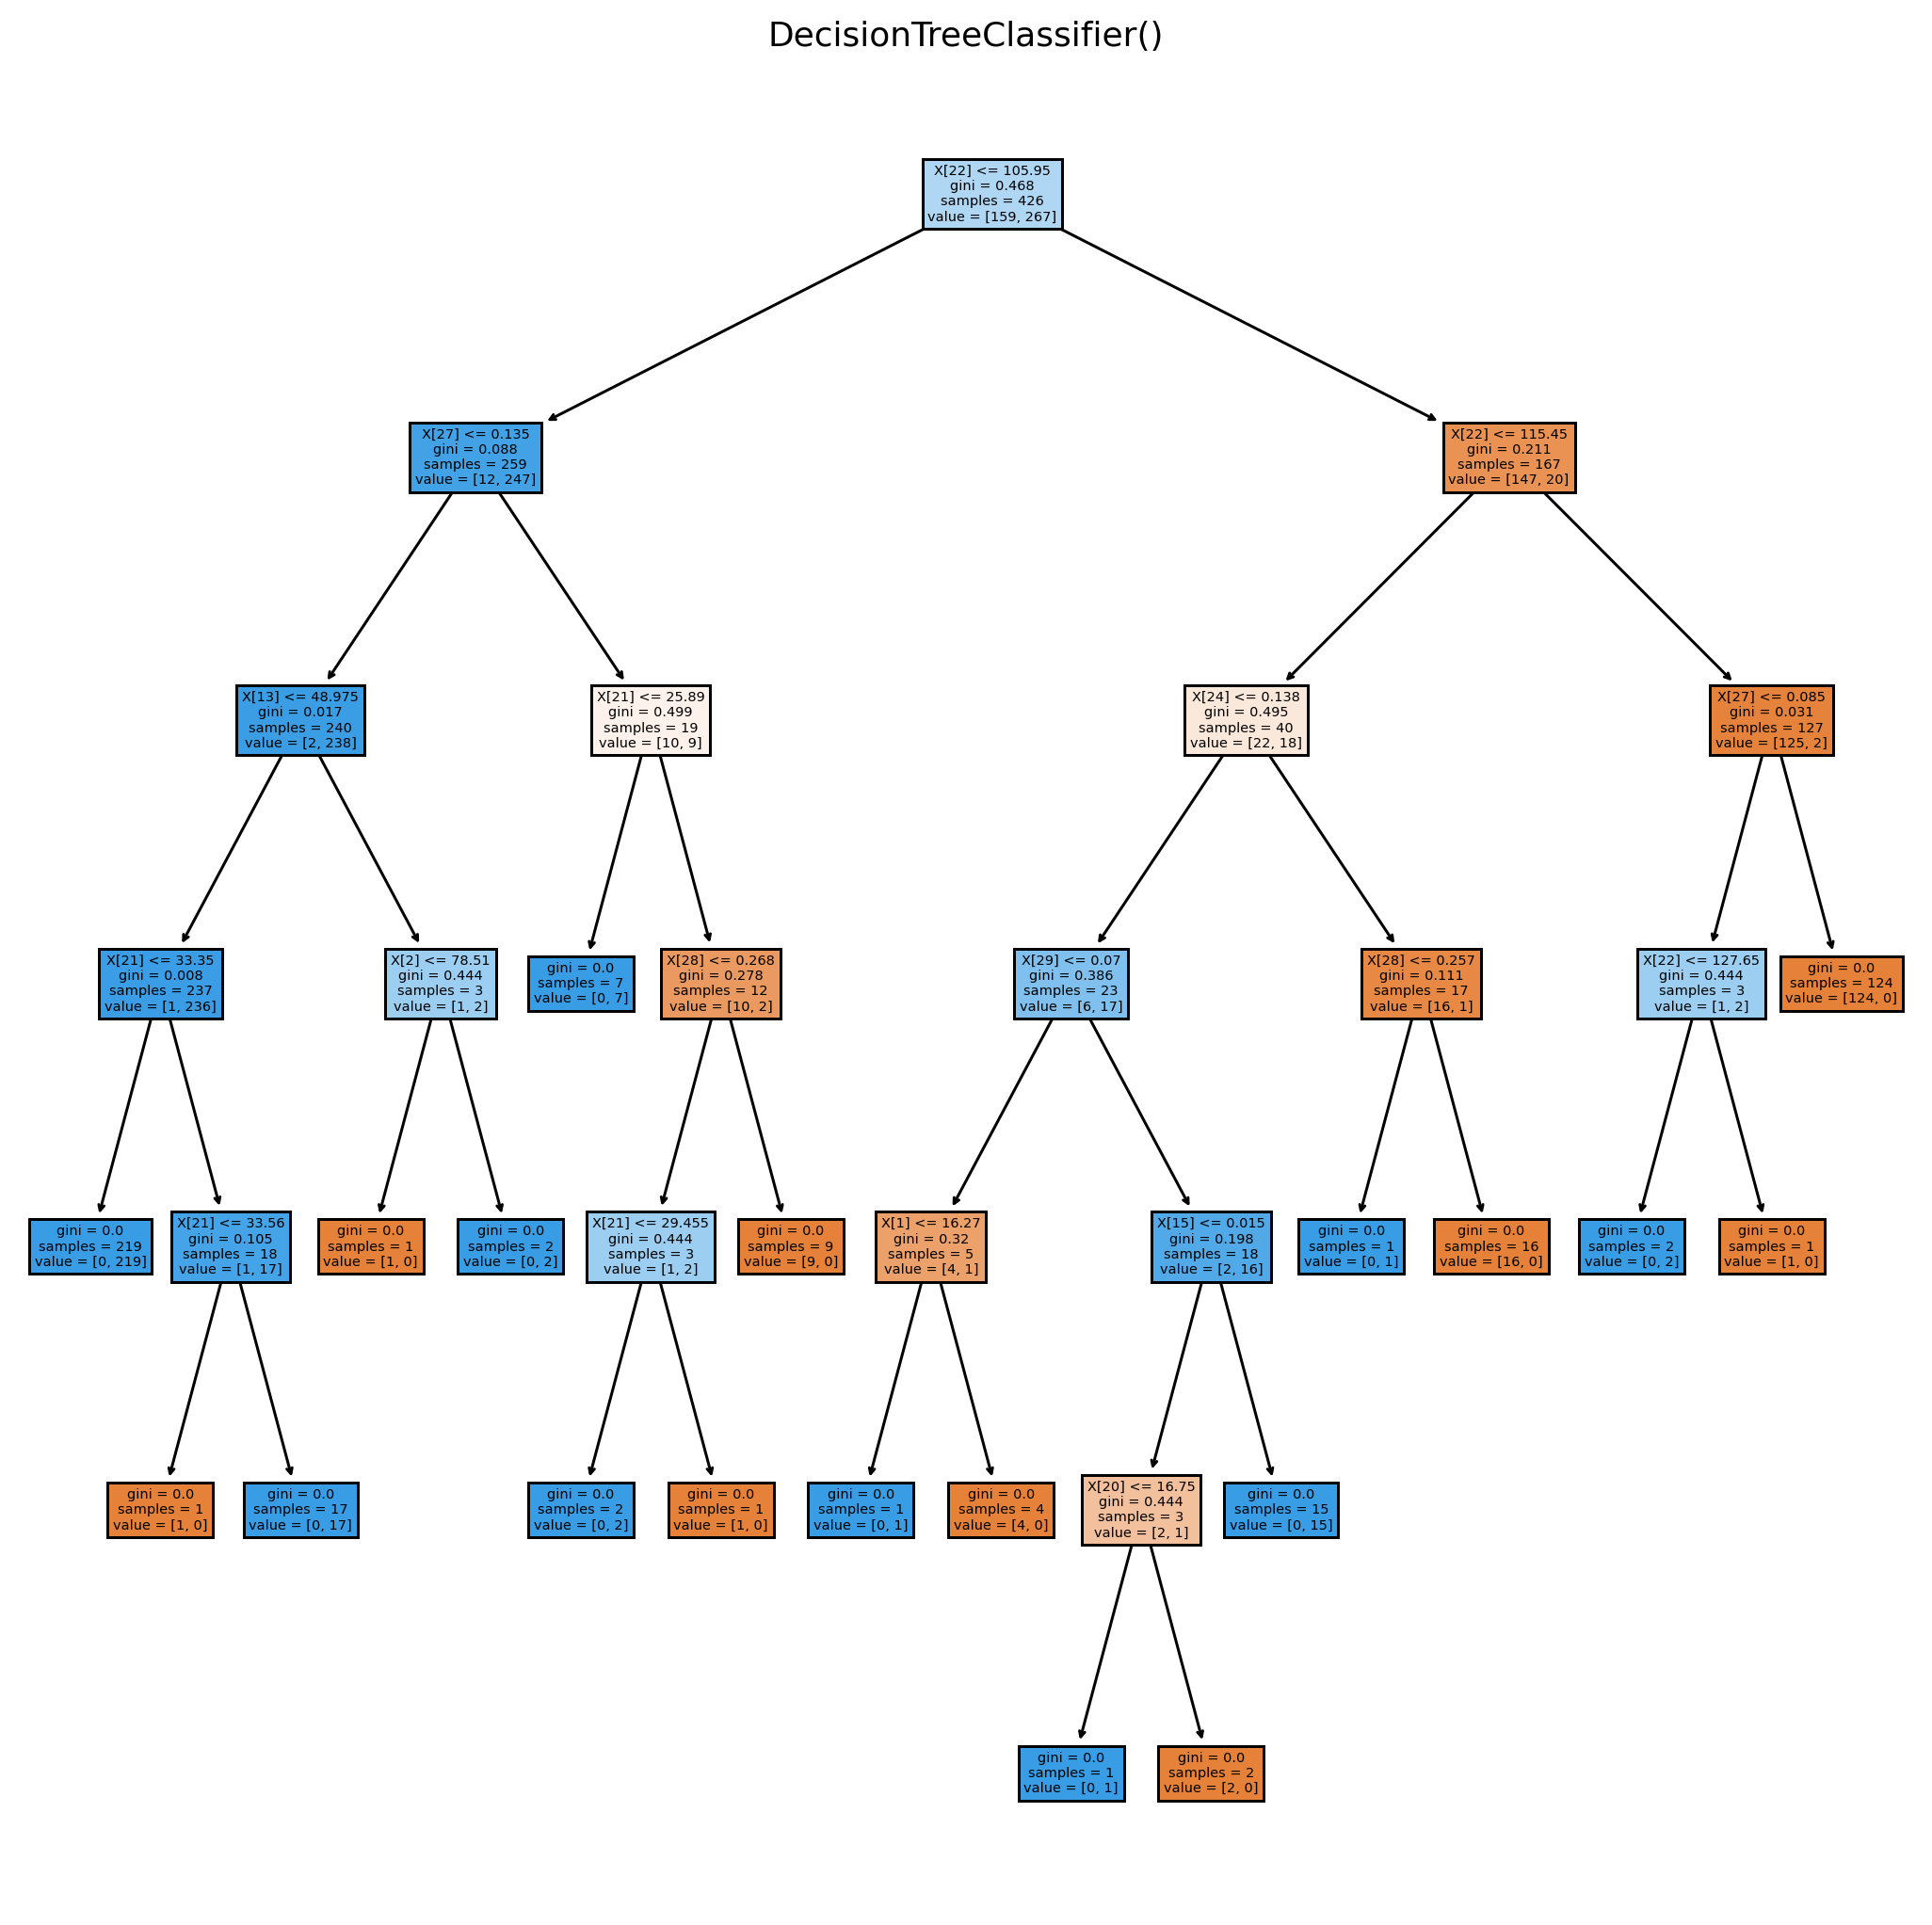

|--- worst perimeter <= 105.95
|   |--- worst concave points <= 0.14
|   |   |--- area error <= 48.98
|   |   |   |--- worst texture <= 33.35
|   |   |   |   |--- class: 1
|   |   |   |--- worst texture >  33.35
|   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |--- class: 1
|   |   |--- area error >  48.98
|   |   |   |--- mean perimeter <= 78.51
|   |   |   |   |--- class: 0
|   |   |   |--- mean perimeter >  78.51
|   |   |   |   |--- class: 1
|   |--- worst concave points >  0.14
|   |   |--- worst texture <= 25.89
|   |   |   |--- class: 1
|   |   |--- worst texture >  25.89
|   |   |   |--- worst symmetry <= 0.27
|   |   |   |   |--- worst texture <= 29.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  29.45
|   |   |   |   |   |--- class: 0
|   |   |   |--- worst symmetry >  0.27
|   |   |   |   |--- class: 0
|--- worst perimeter >  105.95
|   |--- worst perimeter

In [6]:
project.evaluation(model=model, X_eval=X_eval, y_eval=y_eval)